In [ ]:
import keras
from keras import layers
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Activation
from keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

170498071/170498071 [==============================] - 4s 0us/step


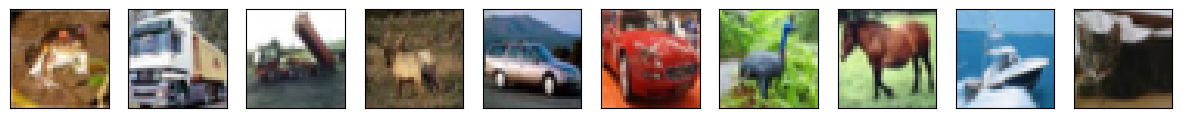

In [ ]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


### AutoEncoder

In [ ]:
encoding_dim = 900

input_img = keras.Input(shape=(3072,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(3072, activation='sigmoid')(encoded)

Autoencoder model

In [ ]:
autoencoder = keras.Model(input_img, decoded)

Encoder model

In [ ]:
encoder = keras.Model(input_img, encoded)

Decoder model

In [ ]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
196/196 [==============================] - 5s 18ms/step - loss: 0.6221 - accuracy: 0.0034 - val_loss: 0.6014 - val_accuracy: 0.0057
Epoch 2/10
196/196 [==============================] - 2s 10ms/step - loss: 0.5958 - accuracy: 0.0071 - val_loss: 0.5916 - val_accuracy: 0.0085
Epoch 3/10
196/196 [==============================] - 2s 10ms/step - loss: 0.5871 - accuracy: 0.0088 - val_loss: 0.5829 - val_accuracy: 0.0083
Epoch 4/10
196/196 [==============================] - 2s 10ms/step - loss: 0.5815 - accuracy: 0.0113 - val_loss: 0.5783 - val_accuracy: 0.0106
Epoch 5/10
196/196 [==============================] - 2s 10ms/step - loss: 0.5780 - accuracy: 0.0127 - val_loss: 0.5748 - val_accuracy: 0.0133
Epoch 6/10
196/196 [==============================] - 2s 10ms/step - loss: 0.5756 - accuracy: 0.0138 - val_loss: 0.5740 - val_accuracy: 0.0140
Epoch 7/10
196/196 [==============================] - 2s 11ms/step - loss: 0.5733 - accuracy: 0.0150 - val_loss: 0.5720 - val_accuracy: 0.0156

In [ ]:
score1 = autoencoder.evaluate(x_test, x_test)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

print(score1)

313/313 [==============================] - 0s 1ms/step
[0.5685777068138123, 0.0210999995470047]


In [ ]:
mu, sigma = 0, 0.5
x_train_noisy = x_train + np.random.normal(mu, sigma, x_train.shape)
x_test_noisy = x_test + np.random.normal(mu, sigma, x_test.shape)

In [ ]:
history2 = autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
196/196 [==============================] - 3s 13ms/step - loss: 0.5872 - accuracy: 0.0075 - val_loss: 0.5847 - val_accuracy: 0.0077
Epoch 2/10
196/196 [==============================] - 2s 12ms/step - loss: 0.5821 - accuracy: 0.0083 - val_loss: 0.5821 - val_accuracy: 0.0078
Epoch 3/10
196/196 [==============================] - 2s 10ms/step - loss: 0.5811 - accuracy: 0.0088 - val_loss: 0.5813 - val_accuracy: 0.0082
Epoch 4/10
196/196 [==============================] - 2s 10ms/step - loss: 0.5801 - accuracy: 0.0088 - val_loss: 0.5815 - val_accuracy: 0.0109
Epoch 5/10
196/196 [==============================] - 2s 11ms/step - loss: 0.5791 - accuracy: 0.0096 - val_loss: 0.5804 - val_accuracy: 0.0081
Epoch 6/10
196/196 [==============================] - 2s 11ms/step - loss: 0.5789 - accuracy: 0.0097 - val_loss: 0.5803 - val_accuracy: 0.0109
Epoch 7/10
196/196 [==============================] - 2s 10ms/step - loss: 0.5787 - accuracy: 0.0102 - val_loss: 0.5809 - val_accuracy: 0.0088

In [ ]:
score2 = autoencoder.evaluate(x_test_noisy, x_test)

encoded_imgs_noisy = encoder.predict(x_test_noisy)
decoded_imgs_noisy = decoder.predict(encoded_imgs_noisy)

print(score2)

313/313 [==============================] - 0s 1ms/step
[0.5819236040115356, 0.009700000286102295]


In [ ]:
noise = np.random.normal(mu, sigma, encoded_imgs_noisy.shape)

encoded_imgs_noisy_code = encoded_imgs_noisy + noise
decoded_imgs_noisy_code = decoder.predict(encoded_imgs_noisy_code)

313/313 [==============================] - 0s 1ms/step


In [ ]:
print('Accuracy Score =',round(np.max(history1.history['accuracy']) * 100, 2) , '%')
print('Accuracy Score =',round(np.max(history2.history['accuracy']) * 100, 2) , '%')

Accuracy Score = 1.77 %
Accuracy Score = 1.1 %


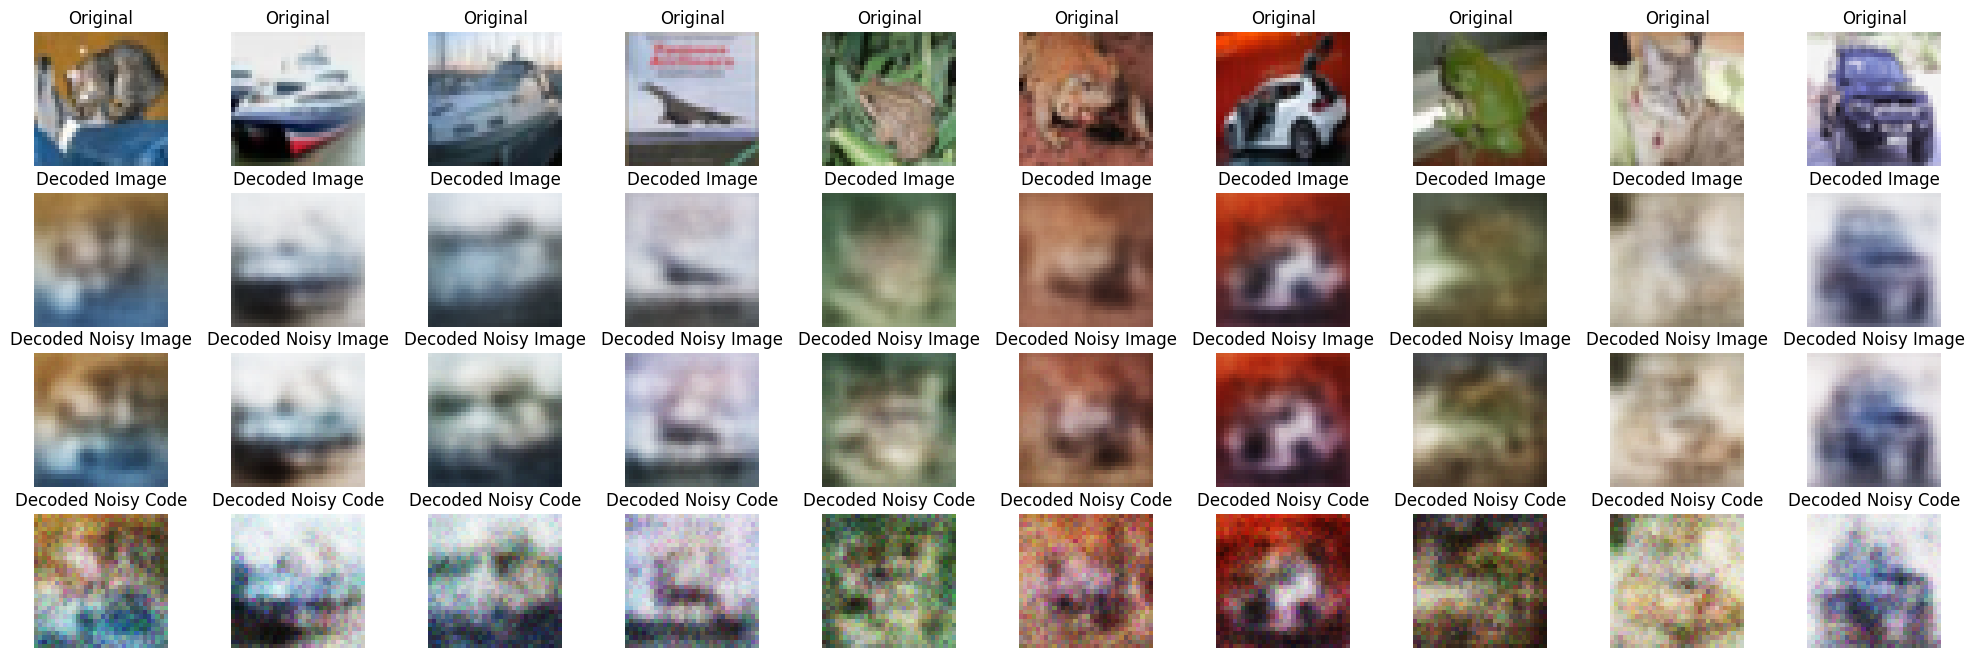

In [ ]:
n = 10
plt.figure(figsize=(25, 8))
for i in range(n):
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(np.clip(x_test[i].reshape(32, 32, 3), 0, 1))
    plt.title('Original')
    plt.axis('off')

    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(np.clip(decoded_imgs[i].reshape(32,32,3),0,1))
    plt.title('Decoded Image')
    plt.axis('off')

    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(np.clip(decoded_imgs_noisy[i].reshape(32, 32, 3),0,1))
    plt.title('Decoded Noisy Image')
    plt.axis('off')

    ax = plt.subplot(4, n, i + 1 + 3 * n)
    plt.imshow(np.clip(decoded_imgs_noisy_code[i].reshape(32, 32, 3),0,1))
    plt.title('Decoded Noisy Code')
    plt.axis('off')

plt.show()

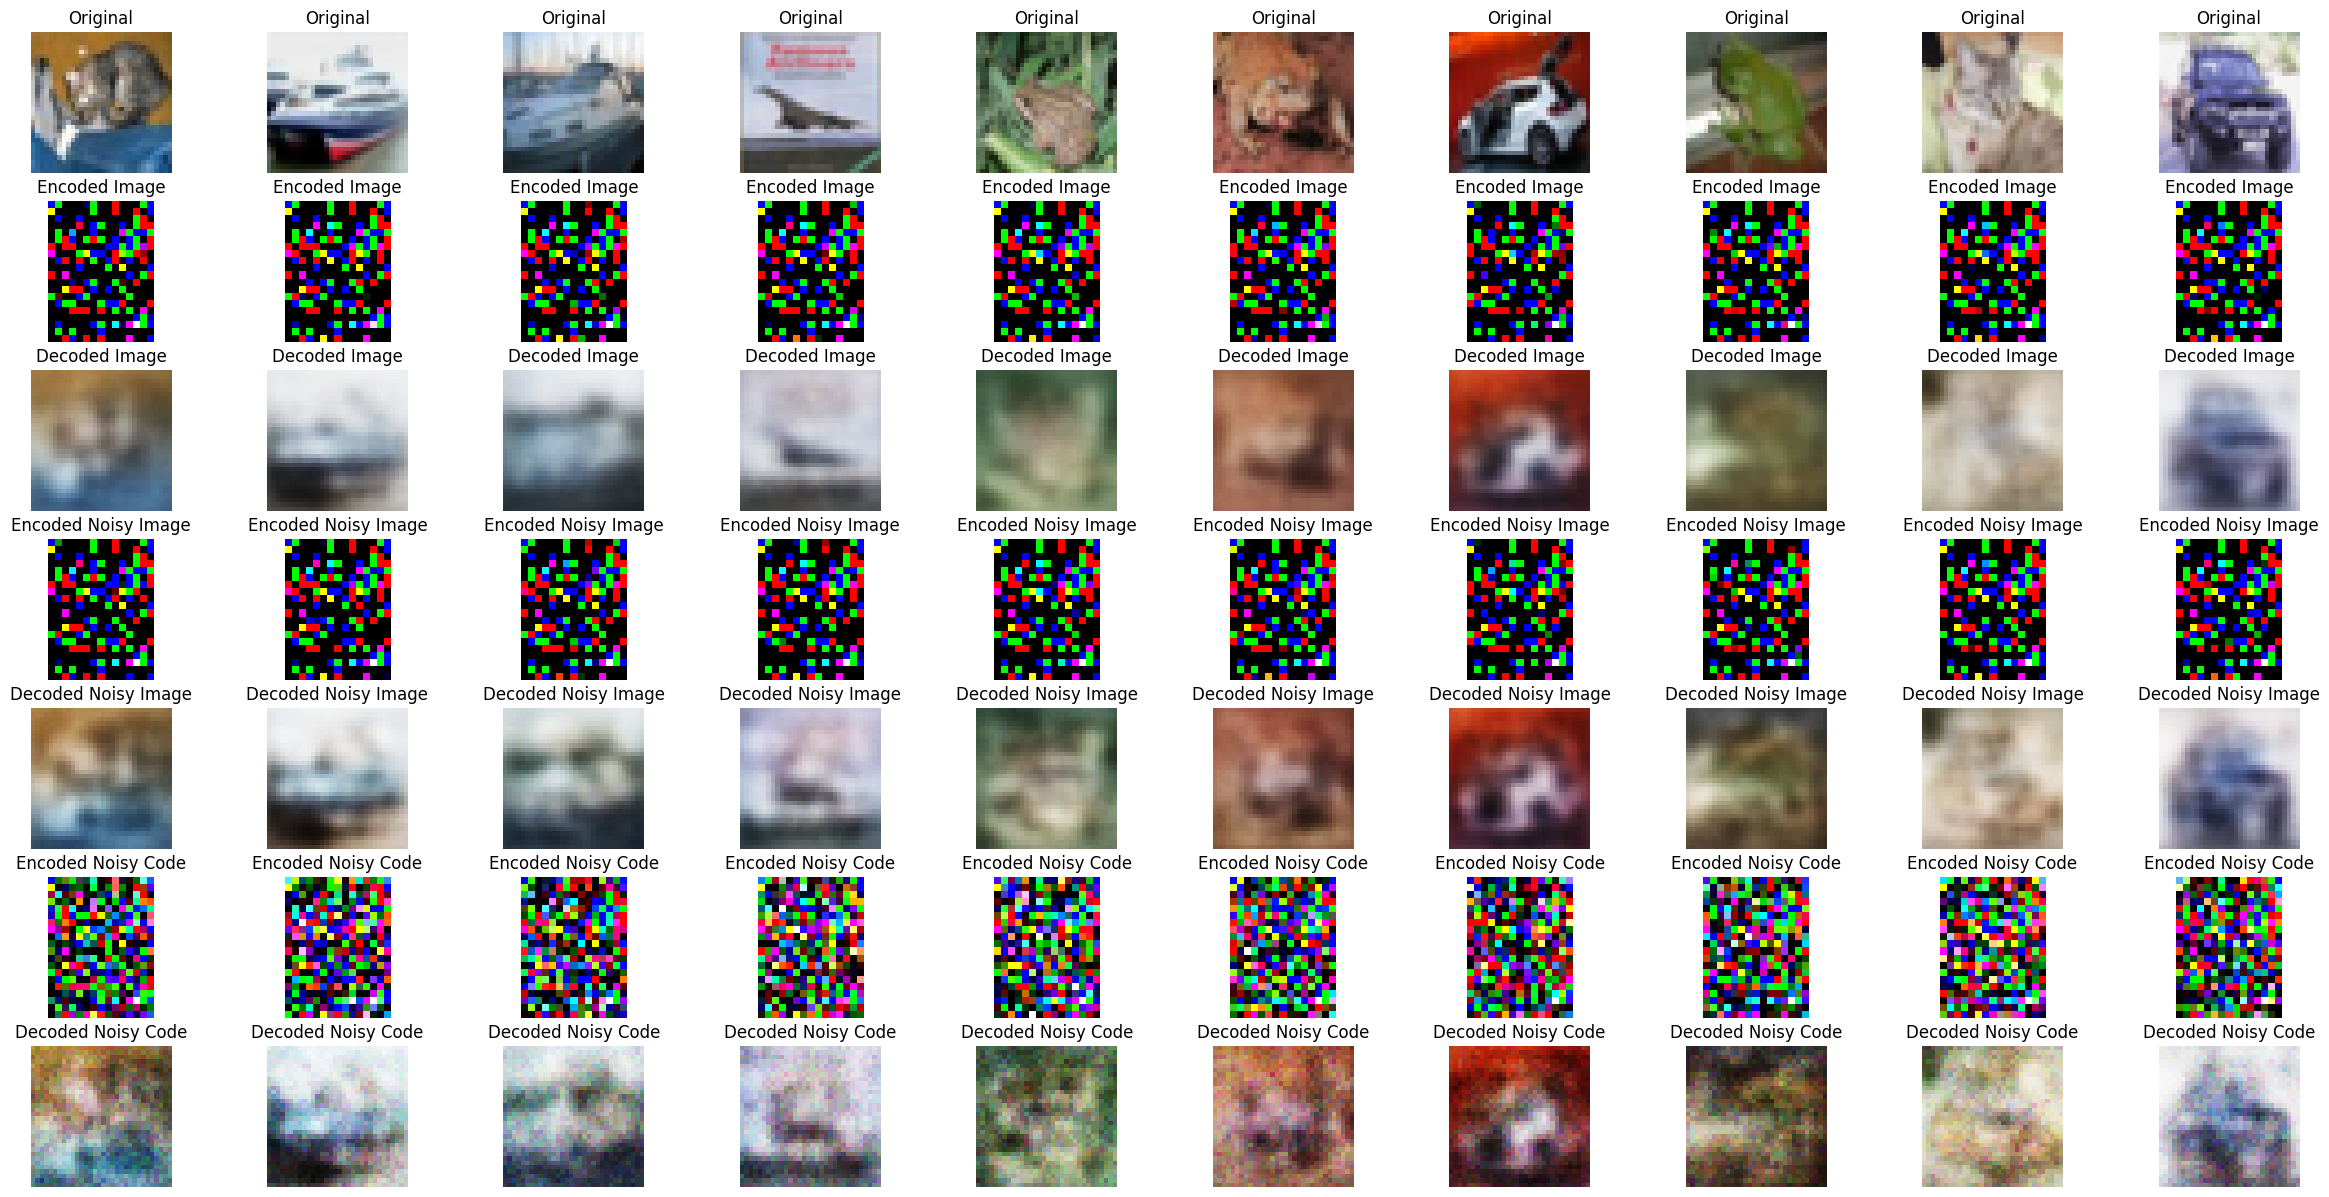

In [ ]:
plt.figure(figsize=(30, 15))
for i in range(n):
    ax = plt.subplot(7, n, i + 1)
    plt.imshow(np.clip(x_test[i].reshape(32, 32, 3), 0, 1))
    plt.title('Original')
    plt.axis('off')

    ax = plt.subplot(7, n, i + 1 + n)
    plt.imshow(np.clip(encoded_imgs[i].reshape(20,15,3),0,1))
    plt.title('Encoded Image')
    plt.axis('off')

    ax = plt.subplot(7, n, i + 1 + 2 * n)
    plt.imshow(np.clip(decoded_imgs[i].reshape(32,32,3),0,1))
    plt.title('Decoded Image')
    plt.axis('off')

    ax = plt.subplot(7, n, i + 1 + 3 * n)
    plt.imshow(np.clip(encoded_imgs_noisy[i].reshape(20,15,3),0,1))
    plt.title('Encoded Noisy Image')
    plt.axis('off')

    ax = plt.subplot(7, n, i + 1 + 4 * n)
    plt.imshow(np.clip(decoded_imgs_noisy[i].reshape(32, 32, 3),0,1))
    plt.title('Decoded Noisy Image')
    plt.axis('off')

    ax = plt.subplot(7, n, i + 1 + 5 * n)
    plt.imshow(np.clip(encoded_imgs_noisy_code[i].reshape(20, 15, 3),0,1))
    plt.title('Encoded Noisy Code')
    plt.axis('off')

    ax = plt.subplot(7, n, i + 1 + 6 * n)
    plt.imshow(np.clip(decoded_imgs_noisy_code[i].reshape(32, 32, 3),0,1))
    plt.title('Decoded Noisy Code')
    plt.axis('off')

plt.show()

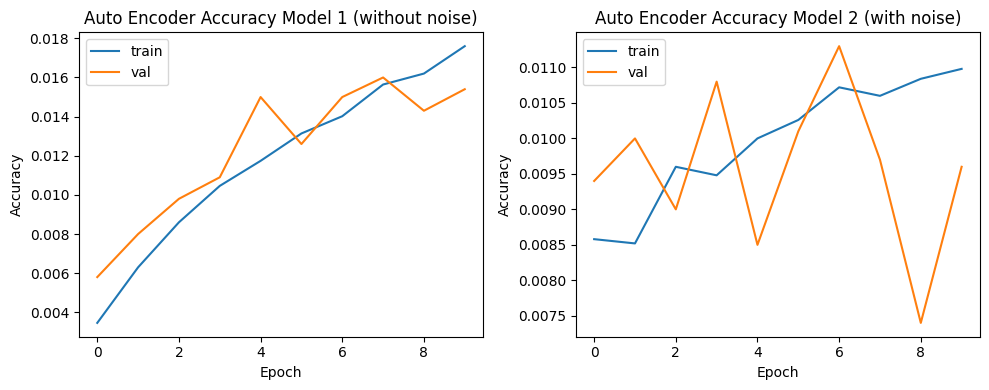

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Auto Encoder Accuracy Model 1 (without noise)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Auto Encoder Accuracy Model 2 (with noise)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

## PCA

In [ ]:
pca = PCA(n_components=900)
x_train_pca = pca.fit_transform(x_train)
pca_denoised1 = pca.inverse_transform(x_train_pca)

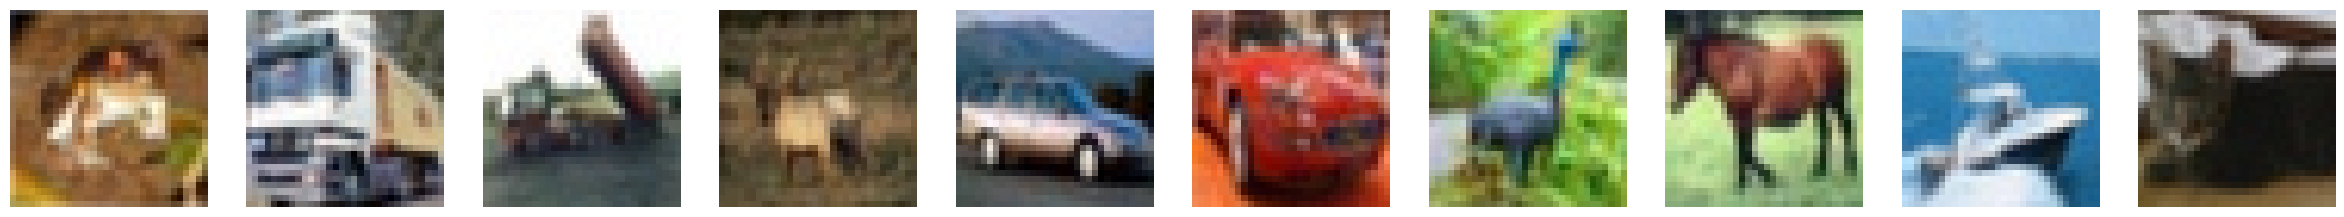

In [ ]:
plt.figure(figsize=(30, 6))
for i in range(n):
    ax = plt.subplot(1, n, i +1)
    plt.imshow(np.clip(pca_denoised1[i].reshape(32, 32, 3), 0, 1))
    plt.axis('off')
plt.show()

In [ ]:
x_train_pca = pca.fit_transform(x_train_noisy)
pca_denoised2 = pca.inverse_transform(x_train_pca)

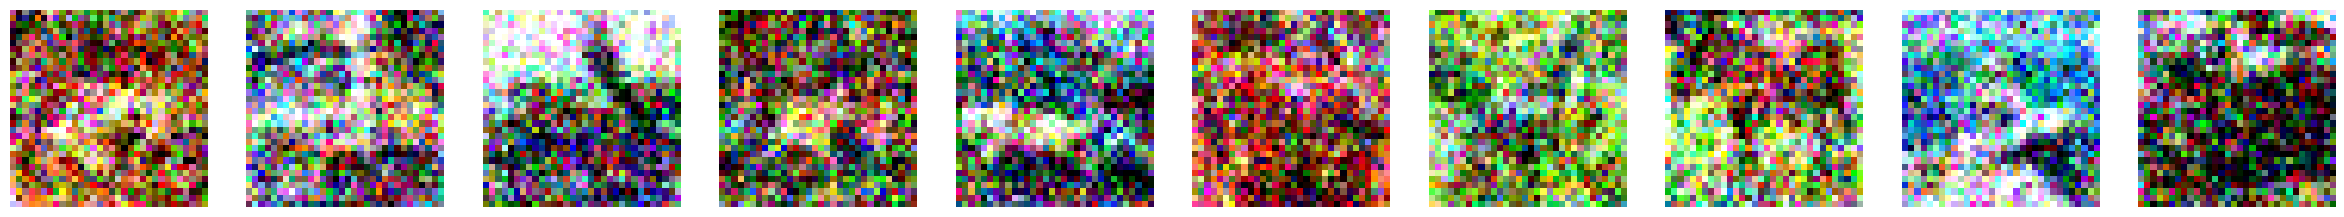

In [ ]:
plt.figure(figsize=(30, 6))
for i in range(n):
    ax = plt.subplot(1, n, i +1)
    plt.imshow(np.clip(pca_denoised2[i].reshape(32, 32, 3), 0, 1))
    plt.axis('off')
plt.show()

- Subjective measure

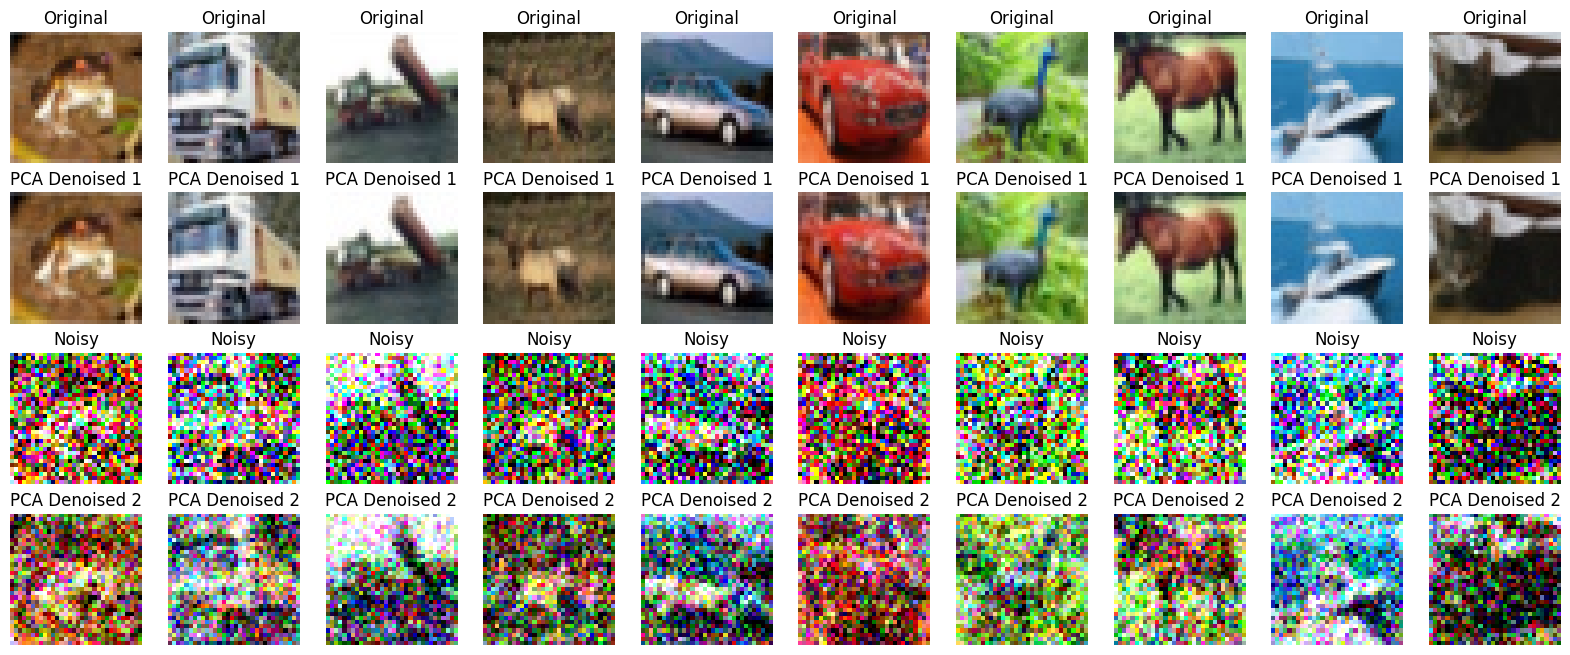

In [ ]:
plt.figure(figsize=(20, 8))

for i in range(n):
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(np.clip(x_train[i].reshape(32, 32, 3),0,1))
    plt.title('Original')
    plt.axis('off')

    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(np.clip(pca_denoised1[i].reshape(32, 32, 3), 0,1))
    plt.title('PCA Denoised 1')
    plt.axis('off')

    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(np.clip(x_train_noisy[i].reshape(32, 32, 3),0,1))
    plt.title('Noisy')
    plt.axis('off')

    ax = plt.subplot(4, n, i + 1 + 3 * n)
    plt.imshow(np.clip(pca_denoised2[i].reshape(32, 32, 3),0,1))
    plt.title('PCA Denoised 2')
    plt.axis('off')

plt.show()

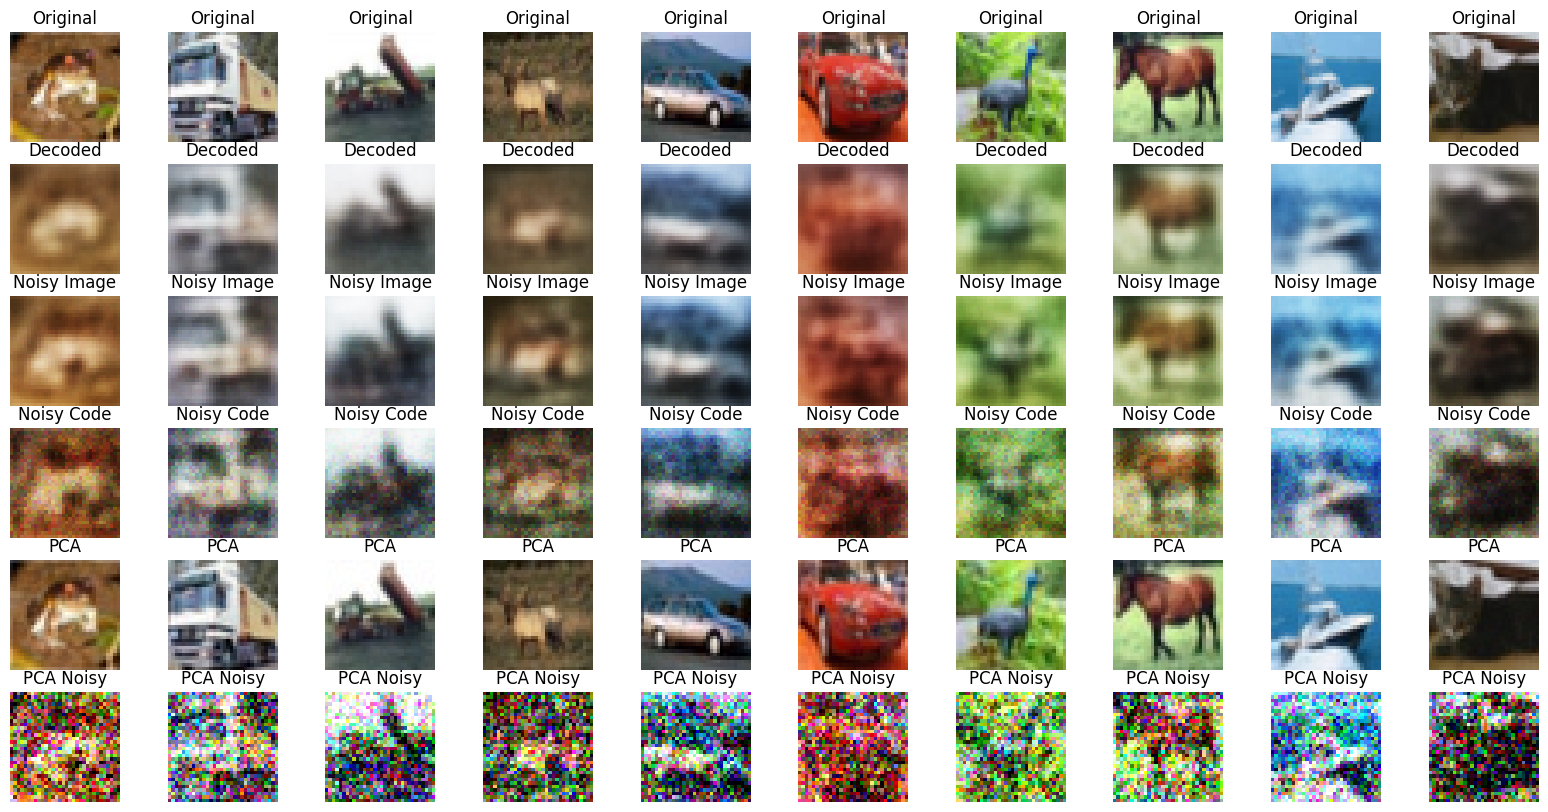

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(n):
    ax = plt.subplot(6, n, i + 1)
    plt.imshow(np.clip(x_train[i].reshape(32, 32, 3), 0, 1))
    plt.title('Original')
    plt.axis('off')

    ax = plt.subplot(6, n, i + 1 + n)
    plt.imshow(np.clip(decoded_imgs[i].reshape(32,32,3), 0, 1))
    plt.title('Decoded')
    plt.axis('off')

    ax = plt.subplot(6, n, i + 1 + 2 * n)
    plt.imshow(np.clip(decoded_imgs_noisy[i].reshape(32, 32, 3), 0, 1))
    plt.title('Noisy Image')
    plt.axis('off')

    ax = plt.subplot(6, n, i + 1 + 3 * n)
    plt.imshow(np.clip(decoded_imgs_noisy_code[i].reshape(32, 32, 3), 0, 1))
    plt.title('Noisy Code')
    plt.axis('off')

    ax = plt.subplot(6, n, i + 1 + 4 * n)
    plt.imshow(np.clip(pca_denoised1[i].reshape(32, 32, 3), 0, 1))
    plt.title('PCA')
    plt.axis('off')

    ax = plt.subplot(6, n, i + 1 + 5 * n)
    plt.imshow(np.clip(pca_denoised2[i].reshape(32, 32, 3), 0, 1))
    plt.title('PCA Noisy')
    plt.axis('off')

plt.show()

- Objective measure

In [ ]:
original_size = 3072
reconstructed_autoencoder_size1 = decoded_imgs.size * decoded_imgs.itemsize
reconstructed_autoencoder_size2 = decoded_imgs_noisy.size * decoded_imgs_noisy.itemsize

reconstructed_pca_size1 = pca_denoised1.size * pca_denoised1.itemsize
reconstructed_pca_size2 = pca_denoised2.size * pca_denoised2.itemsize

print(f"Compression Ratio AutoEncoder without Noise: {reconstructed_autoencoder_size1 / original_size}")
print(f"Compression Ratio PCA without Noise: {reconstructed_pca_size1 / original_size}")

print(f"\nCompression Ratio AutoEncoder with Noise: {reconstructed_autoencoder_size2 / original_size}")
print(f"Compression Ratio PCA with Noise: {reconstructed_pca_size2 / original_size}")

Compression Ratio AutoEncoder without Noise: 40000.0
Compression Ratio PCA without Noise: 200000.0

Compression Ratio AutoEncoder with Noise: 40000.0
Compression Ratio PCA with Noise: 400000.0


In [ ]:
compression_ratio_autoencoder = np.prod(decoded_imgs.shape[1:]) / original_size
compression_ratio_pca = np.prod(pca_denoised1.shape[1:]) / original_size

print(f"Compression Ratio (Auto Encoder): {compression_ratio_autoencoder}")
print(f"Compression Ratio (PCA): {compression_ratio_pca}")

Compression Ratio (Auto Encoder): 1.0
Compression Ratio (PCA): 1.0


## CNN

In [ ]:
x_train = x_train.reshape((len(x_train), 32, 32, 3))
x_test = x_test.reshape((len(x_test), 32, 32, 3))

In [ ]:
input_img = Input((32,32,3))

encoder = Conv2D(32, 3,activation='relu', padding="same")(input_img)
encoder = MaxPooling2D(2)(encoder)
encoder = Conv2D(64, 3,activation='relu', padding="same")(encoder)
encoder = MaxPooling2D(2)(encoder)

code = Conv2D(128, 3,activation='relu', padding="same")(encoder)

up1 = UpSampling2D((2,2))(code)
decoder = Conv2D(64, 3,activation='relu', padding="same")(up1)
up2 = UpSampling2D((2,2))(decoder)
decoder = Conv2D(32, 3,activation='relu', padding="same")(up2)
decoder = Conv2D(3, 1)(decoder)
output = Activation("sigmoid")(decoder)

cnn = Model(input_img, output)

cnn.compile(optimizer='adam', metrics=['accuracy'],loss='binary_crossentropy')

history_cnn = cnn.fit(x_train, x_train, batch_size=256, epochs=10, validation_data=(x_test, x_test), shuffle=True)

Epoch 1/10
196/196 [==============================] - 9s 36ms/step - loss: 0.5840 - accuracy: 0.6737 - val_loss: 0.5666 - val_accuracy: 0.7684
Epoch 2/10
196/196 [==============================] - 6s 30ms/step - loss: 0.5628 - accuracy: 0.7797 - val_loss: 0.5611 - val_accuracy: 0.7988
Epoch 3/10
196/196 [==============================] - 6s 33ms/step - loss: 0.5600 - accuracy: 0.7941 - val_loss: 0.5650 - val_accuracy: 0.7799
Epoch 4/10
196/196 [==============================] - 6s 32ms/step - loss: 0.5586 - accuracy: 0.8031 - val_loss: 0.5588 - val_accuracy: 0.8121
Epoch 5/10
196/196 [==============================] - 7s 36ms/step - loss: 0.5577 - accuracy: 0.8041 - val_loss: 0.5576 - val_accuracy: 0.7993
Epoch 6/10
196/196 [==============================] - 6s 32ms/step - loss: 0.5570 - accuracy: 0.8085 - val_loss: 0.5580 - val_accuracy: 0.8022
Epoch 7/10
196/196 [==============================] - 6s 32ms/step - loss: 0.5564 - accuracy: 0.8099 - val_loss: 0.5566 - val_accuracy: 0.8178

In [ ]:
score3 = cnn.evaluate(x_test, x_test)
prediction_data1 = cnn.predict(x_test)
print(score3)

313/313 [==============================] - 1s 3ms/step
[0.5804885029792786, 0.6313736438751221]


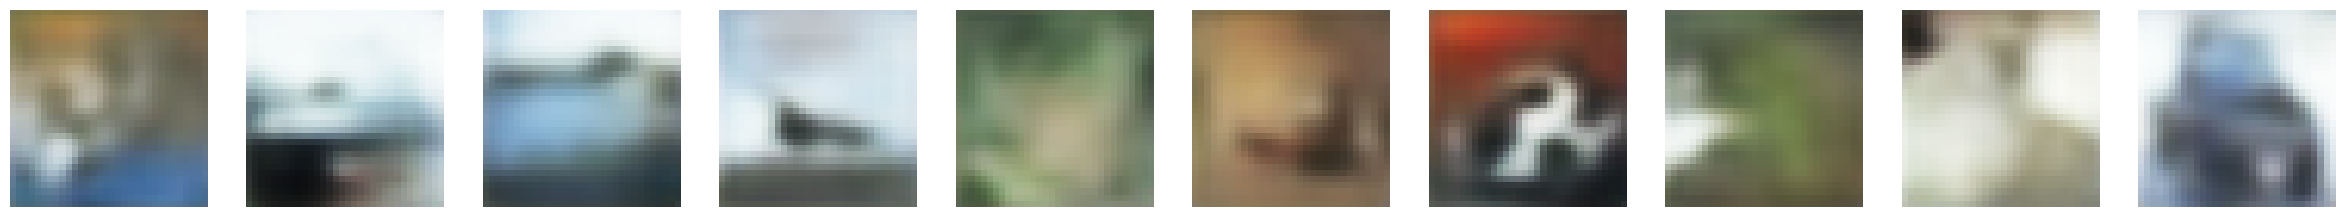

In [ ]:
plt.figure(figsize=(30, 6))
n=10
for i in range(n):
    ax = plt.subplot(1, n, i +1)
    plt.imshow(np.clip(prediction_data1[i].reshape(32, 32, 3), 0, 1))
    plt.axis('off')
plt.show()

In [ ]:
history_cnn2 = cnn.fit(x_train_noisy, x_train, batch_size=256, epochs=10, validation_data=(x_test_noisy, x_test), shuffle=True)

Epoch 1/10
196/196 [==============================] - 7s 36ms/step - loss: 0.5961 - accuracy: 0.5628 - val_loss: 0.5817 - val_accuracy: 0.6226
Epoch 2/10
196/196 [==============================] - 7s 35ms/step - loss: 0.5796 - accuracy: 0.6326 - val_loss: 0.5796 - val_accuracy: 0.6426
Epoch 3/10
196/196 [==============================] - 6s 32ms/step - loss: 0.5781 - accuracy: 0.6430 - val_loss: 0.5786 - val_accuracy: 0.6449
Epoch 4/10
196/196 [==============================] - 6s 32ms/step - loss: 0.5767 - accuracy: 0.6501 - val_loss: 0.5773 - val_accuracy: 0.6444
Epoch 5/10
196/196 [==============================] - 7s 36ms/step - loss: 0.5761 - accuracy: 0.6558 - val_loss: 0.5765 - val_accuracy: 0.6595
Epoch 6/10
196/196 [==============================] - 7s 36ms/step - loss: 0.5755 - accuracy: 0.6586 - val_loss: 0.5762 - val_accuracy: 0.6649
Epoch 7/10
196/196 [==============================] - 7s 36ms/step - loss: 0.5752 - accuracy: 0.6603 - val_loss: 0.5759 - val_accuracy: 0.6578

In [ ]:
score4 = cnn.evaluate(x_test_noisy, x_test)
prediction_data2 = cnn.predict(x_test_noisy)
print(score4)

313/313 [==============================] - 1s 2ms/step
[0.5751245021820068, 0.6585398316383362]


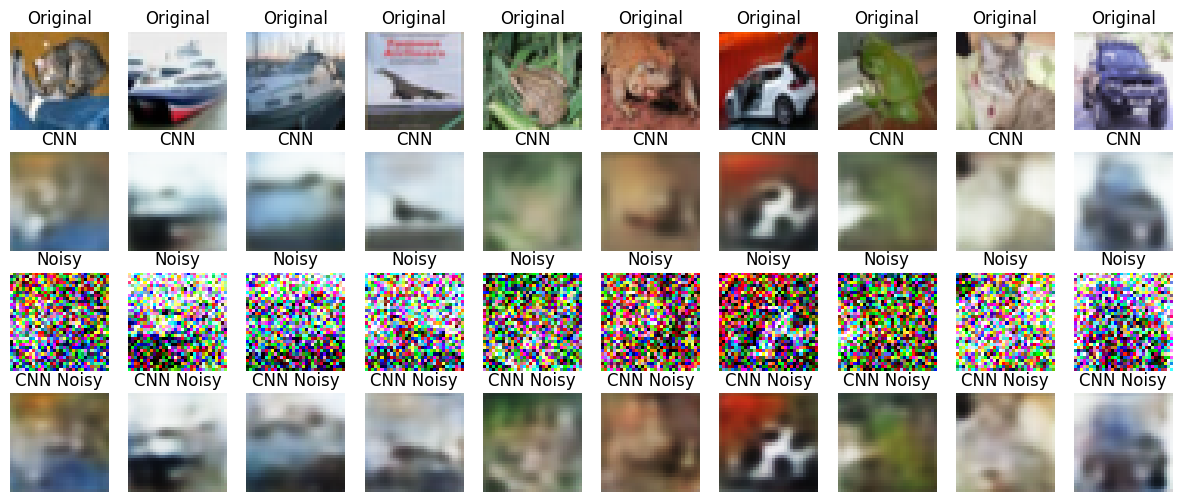

In [ ]:
plt.figure(figsize=(15, 6))
for i in range(n):
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(np.clip(x_test[i].reshape(32, 32, 3), 0, 1))
    plt.title('Original')
    plt.axis('off')

    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(np.clip(prediction_data1[i].reshape(32, 32, 3), 0, 1))
    plt.title('CNN')
    plt.axis('off')

    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(np.clip(x_test_noisy[i].reshape(32, 32, 3), 0, 1))
    plt.title('Noisy')
    plt.axis('off')

    ax = plt.subplot(4, n, i + 1 + 3 * n)
    plt.imshow(np.clip(prediction_data2[i].reshape(32, 32, 3), 0, 1))
    plt.title('CNN Noisy')
    plt.axis('off')

plt.show()

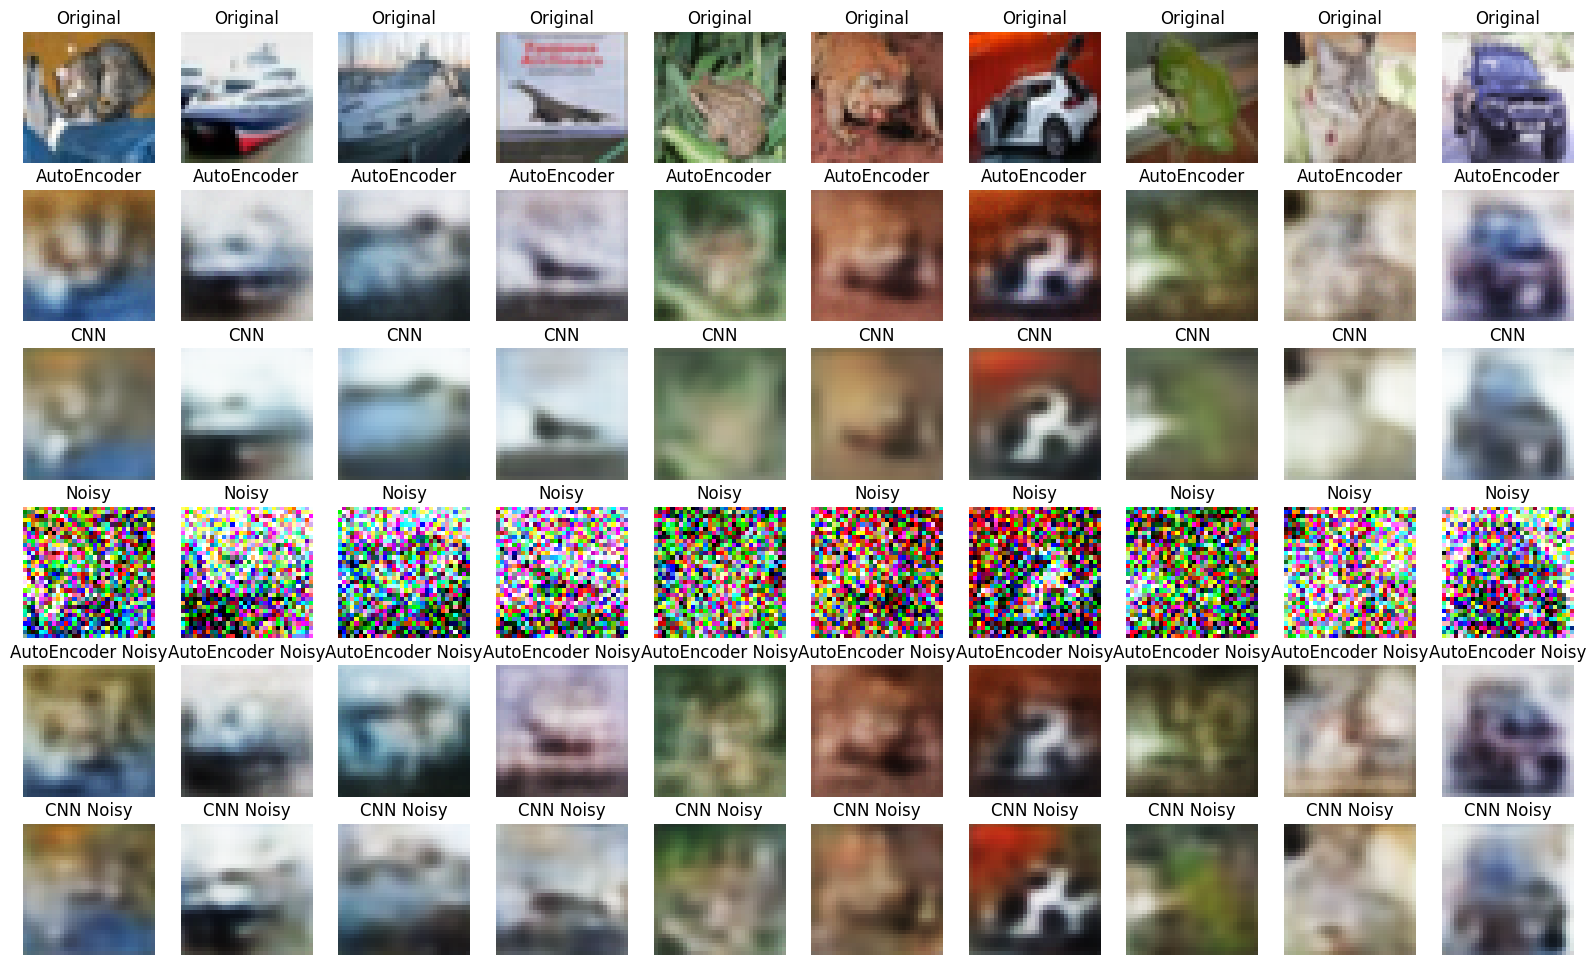

In [ ]:
plt.figure(figsize=(20, 12))
for i in range(n):
    ax = plt.subplot(6, n, i + 1)
    plt.imshow(np.clip(x_test[i].reshape(32, 32, 3), 0, 1))
    plt.title('Original')
    plt.axis('off')

    ax = plt.subplot(6, n, i + 1 + n)
    plt.imshow(np.clip(decoded_imgs[i].reshape(32, 32, 3), 0, 1))
    plt.title('AutoEncoder')
    plt.axis('off')

    ax = plt.subplot(6, n, i + 1 + 2 * n)
    plt.imshow(np.clip(prediction_data1[i].reshape(32,32,3),0,1))
    plt.title('CNN')
    plt.axis('off')

    ax = plt.subplot(6, n, i + 1 + 3 * n)
    plt.imshow(np.clip(x_test_noisy[i].reshape(32, 32, 3),0,1))
    plt.title('Noisy')
    plt.axis('off')

    ax = plt.subplot(6, n, i + 1 + 4 * n)
    plt.imshow(np.clip(decoded_imgs_noisy[i].reshape(32, 32, 3),0,1))
    plt.title('AutoEncoder Noisy')
    plt.axis('off')

    ax = plt.subplot(6, n, i + 1 + 5 * n)
    plt.imshow(np.clip(prediction_data2[i].reshape(32, 32, 3), 0, 1))
    plt.title('CNN Noisy')
    plt.axis('off')

plt.show()

In [ ]:
print('AutoEncoder with Original Image: ', score1)
print('AutoEncoder with Noisy Image: ', score2)
print('CNN with Original Image: ', score3)
print('CNN with Noisy Image: ', score4)
print('\nAutoEncoder Vs CNN Original Images', max(score1[1],score3[1]))
print('AutoEncoder Vs CNN Noisy Images', max(score2[1], score4[1]))

AutoEncoder with Original Image:  [0.5685777068138123, 0.0210999995470047]
AutoEncoder with Noisy Image:  [0.5819236040115356, 0.009700000286102295]
CNN with Original Image:  [0.5804885029792786, 0.6313736438751221]
CNN with Noisy Image:  [0.5751245021820068, 0.6585398316383362]

AutoEncoder Vs CNN Original Images 0.6313736438751221
AutoEncoder Vs CNN Noisy Images 0.6585398316383362


## Conclusion

- AutoEncoder with CNN is better than ANN
- AutoEncoder is better than PCA in denoising images as pca reduce image dimension but don't remove noise
- Adding noise to original image is better than adding noise to the code after encoding